In [43]:
!pip install wordcloud


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re
from collections import Counter

In [45]:
df = pd.read_csv('cleaned_twitter_data (3).csv')

In [46]:
df.head()

,target,stemmed_content
0,0,switchfoot http twitpic com zl awww bummer sho...
1,0,upset updat facebook text might cri result sch...
2,0,kenichan dive mani time ball manag save rest g...
3,0,whole bodi feel itchi like fire
4,0,nationwideclass behav mad see


In [47]:
df.shape

(1600000, 2)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   target           1600000 non-null  int64 
 1   stemmed_content  1599505 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [49]:
df.describe()

,target
count,1600000.0
mean,0.5
std,0.5
min,0.0
25%,0.0
50%,0.5
75%,1.0
max,1.0


In [50]:
print(df.isnull().sum())


target               0
stemmed_content    495
dtype: int64


In [51]:
df.dropna(inplace=True)

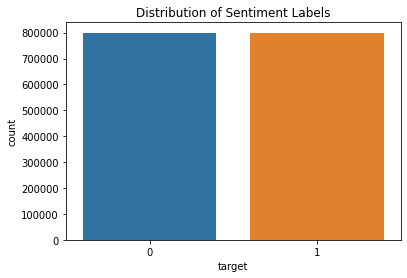

In [52]:
plt.figure(figsize=(6, 4))         
sns.countplot(x='target', data=df) 
plt.title('Distribution of Sentiment Labels')
plt.show()                         

In [53]:
df.shape

(1599505, 2)

In [54]:
df['tweet_length'] = df['stemmed_content'].apply(len)

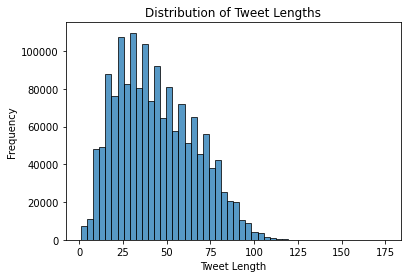

In [55]:
plt.hist(df['tweet_length'], bins=50, alpha=0.75, edgecolor='black')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show() # right skewed , almost 25 word in one tweet.

In [56]:
all_words = ' '.join(df['stemmed_content'])
word_counts = Counter(all_words.split())

In [57]:
most_common_words = word_counts.most_common(20)
words, counts = zip(*most_common_words)

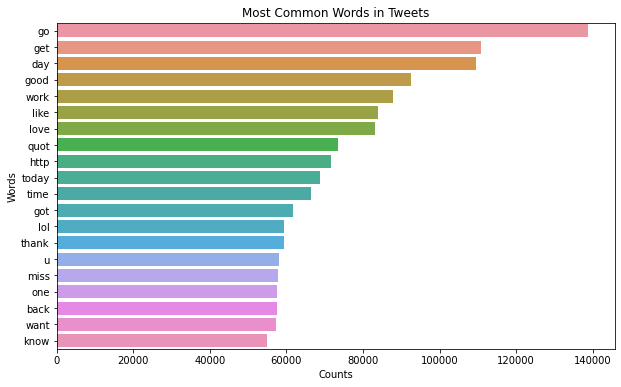

In [58]:
words = list(words)  
counts = list(counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words) 
plt.title('Most Common Words in Tweets')
plt.xlabel('Counts')  
plt.ylabel('Words')  
plt.show()
# in all tweets pos & neg

In [59]:
mean_length = df.groupby('target')['tweet_length'].mean()
print(mean_length)

target
0    43.192657
1    44.665742
Name: tweet_length, dtype: float64


In [60]:
from collections import Counter

In [61]:
positive_tweets = ' '.join(df[df['target'] == 1]['stemmed_content'])
negative_tweets = ' '.join(df[df['target'] == 0]['stemmed_content'])

In [62]:
# Count the most common words in both + & -
pos_word_counts = Counter(positive_tweets.split())
neg_word_counts = Counter(negative_tweets.split())

In [63]:
# most common words in pos and neg
most_common_positive_words = pos_word_counts.most_common(20)
most_common_negative_words = neg_word_counts.most_common(20)

In [64]:
# Separate words and count
pos_words, pos_counts = zip(*most_common_positive_words)
neg_words, neg_counts = zip(*most_common_negative_words)

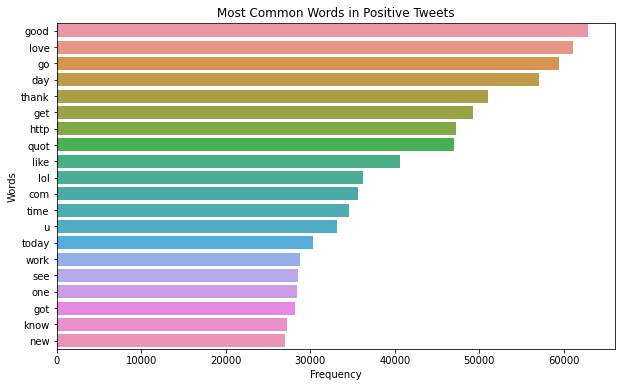

In [65]:
# Convert tuples to lists if needed
pos_words = list(pos_words)
pos_counts = list(pos_counts)

# Plot bar chart for positive tweets
plt.figure(figsize=(10, 6))
sns.barplot(x=pos_counts, y=pos_words)
plt.title('Most Common Words in Positive Tweets')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


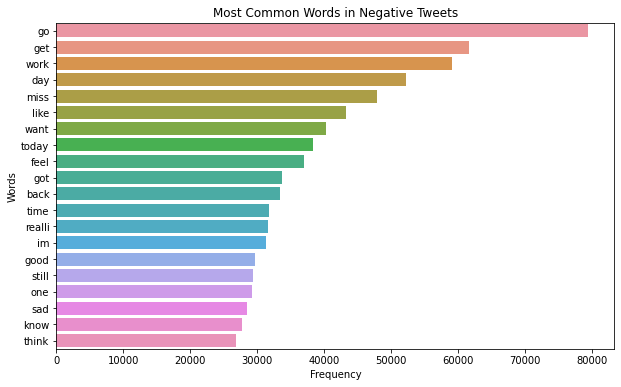

In [66]:
neg_words = list(neg_words)
neg_counts = list(neg_counts)

# Plot bar chart for negative tweets
plt.figure(figsize=(10, 6))
sns.barplot(x=neg_counts, y=neg_words)
plt.title('Most Common Words in Negative Tweets')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

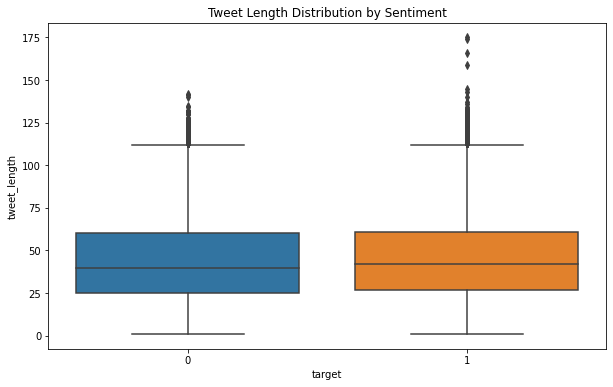

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='tweet_length', data=df)
plt.title('Tweet Length Distribution by Sentiment')
plt.show()

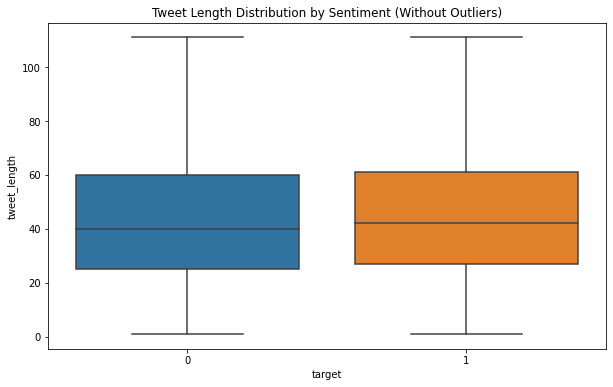

In [68]:
# Calculate Q1(25%) and Q3(75%)
Q1 = df['tweet_length'].quantile(0.25)
Q3 = df['tweet_length'].quantile(0.75)

IQR = Q3 - Q1

# Defining the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
df_filtered = df[(df['tweet_length'] >= lower_bound) & (df['tweet_length'] <= upper_bound)]

# Ploting
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='tweet_length', data=df_filtered)
plt.title('Tweet Length Distribution by Sentiment (Without Outliers)')
plt.show()


In [69]:
wordcloud_positive = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=400).generate(positive_tweets)


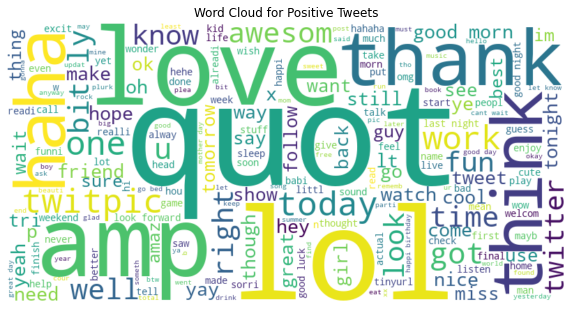

In [70]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Tweets')
plt.show()

In [71]:
wordcloud_negative = WordCloud(stopwords=STOPWORDS, background_color='black', width=800, height=400).generate(negative_tweets)

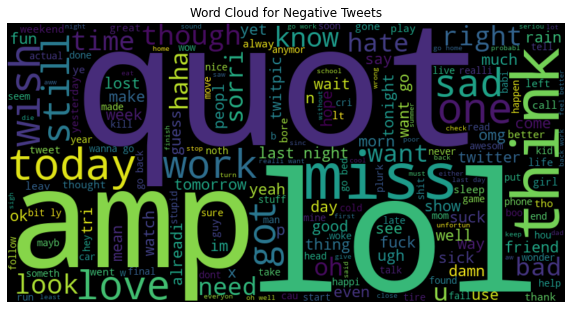

In [72]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Tweets')
plt.show()

C:\Users\Sarah
